In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling as pandas_profiling

from matplotlib import pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from geopy.distance import geodesic

In [115]:
data = pd.read_csv('taxi.csv')
data

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
0       1105373            5        20       6080    174182        55.818842   
1        759733            5        14       6080    358774        55.805342   
2        416977            6        14       6080    866260        55.813978   
3        889660            2         6       6080    163522        55.745922   
4       1120055            4        16       6080    506710        55.803578   
...         ...          ...       ...        ...       ...              ...   
99995    726210            0         2       2442     27360        55.961246   
99996    881472            0         1       2442    381960        55.961246   
99997    626673            1        20       2442    627126        55.961315   
99998    672584            6        21       2442    140623        55.961354   
99999    542637            0        23       2442    140050        55.961364   

       driver_longitude  origin_order_latitude  origin_order_longitude  \
0             37.334562              55.814567               37.355010   
1             37.515023              55.819329               37.466398   
2             37.347688              55.814827               37.354074   
3             37.421748              55.743469               37.431130   
4             37.521602              55.812559               37.527407   
...                 ...                    ...                     ...   
99995         37.413497              55.966694               37.415754   
99996         37.413497              55.964892               37.413543   
99997         37.413497              55.962203               37.416373   
99998         37.413864              55.964892               37.413543   
99999         37.413864              55.962322               37.407117   

       distance_km  duration_min offer_class_group ride_type_desc  \
0           -1.000        -1.000           Economy        private   
1           18.802        25.217          Standard        private   
2            6.747         9.800           Economy        private   
3           -1.000        -1.000           Economy        private   
4           12.383        19.250           Economy        private   
...            ...           ...               ...            ...   
99995       17.378        29.817           Economy        private   
99996        7.751        12.683           Economy        private   
99997       46.983        46.217          Standard        private   
99998       50.029        51.100           Economy        private   
99999       54.811        56.183          Standard        private   

       driver_response  
0                    0  
1                    1  
2                    0  
3                    1  
4                    1  
...                ...  
99995                0  
99996                0  
99997                0  
99998                0  
99999                0  

[100000 rows x 14 columns]

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   offer_gk                100000 non-null  int64  
 1   weekday_key             100000 non-null  int64  
 2   hour_key                100000 non-null  int64  
 3   driver_gk               100000 non-null  int64  
 4   order_gk                100000 non-null  int64  
 5   driver_latitude         100000 non-null  float64
 6   driver_longitude        100000 non-null  float64
 7   origin_order_latitude   100000 non-null  float64
 8   origin_order_longitude  100000 non-null  float64
 9   distance_km             100000 non-null  float64
 10  duration_min            100000 non-null  float64
 11  offer_class_group       100000 non-null  object 
 12  ride_type_desc          100000 non-null  object 
 13  driver_response         100000 non-null  int64  
dtypes: float64(6), int64(

In [117]:
data.describe()

offer_gk    weekday_key       hour_key      driver_gk  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   5.662189e+05       3.159860      13.827790    3446.376360   
std    3.259360e+05       2.054222       7.306496    2038.738677   
min    4.000000e+00       0.000000       0.000000      14.000000   
25%    2.855552e+05       1.000000       8.000000    1421.000000   
50%    5.656715e+05       3.000000      16.000000    3506.500000   
75%    8.487198e+05       5.000000      20.000000    5242.000000   
max    1.130355e+06       6.000000      23.000000    6806.000000   

           order_gk  driver_latitude  driver_longitude  origin_order_latitude  \
count  100000.00000    100000.000000     100000.000000          100000.000000   
mean   460867.01291        55.700824         37.492292              55.772440   
std    266064.98953         2.135903          1.454640               0.665985   
min        18.00000        -1.000000         -1.000000              -1.000000   
25%    229178.50000        55.708651         37.413497              55.708032   
50%    462420.00000        55.772904         37.533664              55.772561   
75%    690894.00000        55.960667         37.624113              55.962000   
max    920344.00000        56.174097         38.280547              56.311121   

       origin_order_longitude    distance_km   duration_min  driver_response  
count           100000.000000  100000.000000  100000.000000    100000.000000  
mean                37.541637      18.393518      23.134841         0.492480  
std                  0.467758      41.129296      33.890105         0.499946  
min                 -1.000000      -1.000000      -1.000000         0.000000  
25%                 37.407117      -1.000000      -1.000000         0.000000  
50%                 37.532537      10.411500      19.700000         0.000000  
75%                 37.624358      30.665250      37.867000         1.000000  
max                 38.243608    5234.283000    3958.283000         1.000000

In [108]:
data.profile_report()

###### Резюме по структуре данных
1. offer_gk – идентификатор предложения: видим 100% уникальных значений, ценности для модели не представляет, удаляем
2. weekday_key – номер дня недели, начиная с воскресения: предположительно ценные данные, так как день недели может иметь вляние на работу такси; необходимо перевести в отдельный признак со значением 1/0 (опционально можно сгруппировать по признаку выходные/рабочие дни, чтобы сократить число полей)
3. hour_key – час дня: предположительно ценные данные, так как текущее время может иметь вляние на работу такси, также преобразовываем в категориальный признак, группируем по части суток, чтобы сократить число полей
4. driver_gk – уникальный номер водителя: каждый водитель теоретически может иметь свои предпочтения по работе, которые можно было бы учесть, но водителей слишком много (400+), поэтому, кажется, не очень подходит для анализа + по идее в большом масштабе индивидуальные предпочтения водителей должны обобщаться в некую среднюю тенденцию / общие предпочтения  
5. order_gk – идинтификатор заказа (предположительно в рамках заказа может быть несколько предложений водителям): видим 80% уникальных значений, ценности для модели не представляет
6. driver_latitude – координаты широты местонахождения водителя
7. driver_longitude – координаты долготы местонахождения водителя
8. origin_order_latitude – координаты широты местонахождения пассажира при отправке заказа
9. origin_order_longitude – координаты долготы местонахождения пассажира при отправке заказа: эти четыре поля невозможно использовать в качестве количественных параметров, зато можно вычислить расстояние от водителя до пассажира, что может служить хорошим критерием для принятия решения водителем (далеко ли необходимо ехать, чтобы начать поездку). Имеется некоторое количество записей со значениями '-1' (~200 шт), их удалим так как число небольшое
10. distance_km – расстояние от начала поездки до места назначения: 1) есть большое число записей (~30К) со значением '-1' (место назначения не определено) и '0';  2) есть небольшое количество поездок с расстоянием более 1000 км, что вызывает вопросы. Это не позволяет использовать расстояние в качестве количественного признака. Переведем признак в категориальный со значениями: "Расстояние не определено", "0-3 км", "3-5 км", "5-10" км и т.п., чтобы сохранить информацию. Значения свыше 300 км кажутся не очень релевантными, их немного, поэтому удалим их
11. duration_min – расчетное время поездки: видим высокую степень корреляции с расстоянием поездки, кажется, в этом поле нет необходимост, удаляем 
12. offer_class_group – класс заказа (экономический, бизнес, VIP и т.п.): распеределение по категориям неравномерное, есть очень небольшие категории (VIP, VIP+, XL), возможно их стоит объединить в категорию "прочие", по крайней мере для начала объединим VIP и VIP+, а также удалим категорию 'Test'
13. ride_type_desc – тип поездки (частная, корпоративная): есть небольшая категория SMB, всего 36 записей, удалим их, чтобы сократить число полей
14. driver_response – индикатор решения водителя взять заказ, целевое значение модели 


###### 1. Weekday, hour
Преобразуем поле 'hour_key' в катериальный признак, укрупняем до времени суток, чтобы не создавать 20 лишних полей

In [118]:
def get_day_part(row):
    if row['hour_key'] >= 0 and row['hour_key'] < 6:
        return 'night'
    if row['hour_key'] >= 6 and row['hour_key'] < 12:
        return 'morning'
    if row['hour_key'] >= 12 and row['hour_key'] < 18:
        return 'day'
    if row['hour_key'] >= 18 and row['hour_key'] <= 23:
        return 'evening'
    return 'undefined'

data['day_part'] = data.apply(get_day_part, axis=1)

oh_enc = OneHotEncoder()
ohe_day_part = oh_enc.fit_transform(data[['day_part']]).toarray()
ohe_day_part = pd.DataFrame(ohe_day_part, columns=oh_enc.categories_[0])

data = data.reset_index(drop=True)
data = data.join(ohe_day_part)

data.drop(['day_part'], axis=1, inplace=True)


Поле 'weekday_key' по сути уже категориальный признак, переименуем его значения, чтобы иметь более приятные названия полей

In [119]:
def get_weekday(row):
    if row['weekday_key'] == 0:
        return 'Sun'
    if row['weekday_key'] == 1:
        return 'Mon'
    if row['weekday_key'] == 2:
        return 'Tue'
    if row['weekday_key'] == 3:
        return 'Wed'
    if row['weekday_key'] == 4:
        return 'Thu'
    if row['weekday_key'] == 5:
        return 'Fri'
    if row['weekday_key'] == 6:
        return 'Sat'

    return 'undefined'

data['weekday'] = data.apply(get_weekday, axis=1)

oh_enc = OneHotEncoder()
ohe_weekday = oh_enc.fit_transform(data[['weekday']]).toarray()
ohe_weekday = pd.DataFrame(ohe_weekday, columns=oh_enc.categories_[0])

data = data.reset_index(drop=True)
data = data.join(ohe_weekday)

data.drop(['weekday'], axis=1, inplace=True)
data

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
0       1105373            5        20       6080    174182        55.818842   
1        759733            5        14       6080    358774        55.805342   
2        416977            6        14       6080    866260        55.813978   
3        889660            2         6       6080    163522        55.745922   
4       1120055            4        16       6080    506710        55.803578   
...         ...          ...       ...        ...       ...              ...   
99995    726210            0         2       2442     27360        55.961246   
99996    881472            0         1       2442    381960        55.961246   
99997    626673            1        20       2442    627126        55.961315   
99998    672584            6        21       2442    140623        55.961354   
99999    542637            0        23       2442    140050        55.961364   

       driver_longitude  origin_order_latitude  origin_order_longitude  \
0             37.334562              55.814567               37.355010   
1             37.515023              55.819329               37.466398   
2             37.347688              55.814827               37.354074   
3             37.421748              55.743469               37.431130   
4             37.521602              55.812559               37.527407   
...                 ...                    ...                     ...   
99995         37.413497              55.966694               37.415754   
99996         37.413497              55.964892               37.413543   
99997         37.413497              55.962203               37.416373   
99998         37.413864              55.964892               37.413543   
99999         37.413864              55.962322               37.407117   

       distance_km  ...  evening morning night  Fri  Mon  Sat  Sun  Thu  Tue  \
0           -1.000  ...      1.0     0.0   0.0  1.0  0.0  0.0  0.0  0.0  0.0   
1           18.802  ...      0.0     0.0   0.0  1.0  0.0  0.0  0.0  0.0  0.0   
2            6.747  ...      0.0     0.0   0.0  0.0  0.0  1.0  0.0  0.0  0.0   
3           -1.000  ...      0.0     1.0   0.0  0.0  0.0  0.0  0.0  0.0  1.0   
4           12.383  ...      0.0     0.0   0.0  0.0  0.0  0.0  0.0  1.0  0.0   
...            ...  ...      ...     ...   ...  ...  ...  ...  ...  ...  ...   
99995       17.378  ...      0.0     0.0   1.0  0.0  0.0  0.0  1.0  0.0  0.0   
99996        7.751  ...      0.0     0.0   1.0  0.0  0.0  0.0  1.0  0.0  0.0   
99997       46.983  ...      1.0     0.0   0.0  0.0  1.0  0.0  0.0  0.0  0.0   
99998       50.029  ...      1.0     0.0   0.0  0.0  0.0  1.0  0.0  0.0  0.0   
99999       54.811  ...      1.0     0.0   0.0  0.0  0.0  0.0  1.0  0.0  0.0   

       Wed  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
...    ...  
99995  0.0  
99996  0.0  
99997  0.0  
99998  0.0  
99999  0.0  

[100000 rows x 25 columns]

###### 2. driver_latitude, driver_longitude,  origin_order_latitude, origin_order_longitude
Уберем некорректные значения, рассчитаем расстояние от пассажира до водителя при отправке заказа

In [120]:
def get_origin_distance(row):
    driver = (row['driver_latitude'],row['driver_longitude'])
    origin = (row['origin_order_latitude'],row['origin_order_longitude'])
    
    return geodesic(driver, origin).kilometers    

data = data[data['driver_latitude'] > 0]
data = data[data['origin_order_latitude'] > 0]

data['origin_distance'] = data.apply(get_origin_distance, axis=1)


###### 3. distance_km
Преобразуем поле 'distance_km' в катериальный признак, заменим значения '-1' и '0' на 'Undefined'

In [121]:
def get_distance_cat(row):
    if row['distance_km'] == -1:
        return 'Undef_km'
    if row['distance_km'] == 0:
        return 'Undef_km'
    if row['distance_km'] > 0 and row['distance_km'] <= 3:
        return '0-3km'
    if row['distance_km'] > 3 and row['distance_km'] <= 5:
        return '3-5km'
    if row['distance_km'] > 5 and row['distance_km'] <= 10:
        return '5-10km'
    if row['distance_km'] > 10 and row['distance_km'] <= 20:
        return '10-20km'
    if row['distance_km'] > 20 and row['distance_km'] <= 40:
        return '20-40km'
    if row['distance_km'] > 40 and row['distance_km'] <= 60:
        return '40-60km'
    if row['distance_km'] > 60:
        return '60+km'

    return 'Undef_km'


data = data[data['distance_km'] <= 300]

data['distance_cat'] = data.apply(get_distance_cat, axis=1)

oh_enc = OneHotEncoder()
ohe_distance_cat = oh_enc.fit_transform(data[['distance_cat']]).toarray()
ohe_distance_cat = pd.DataFrame(ohe_distance_cat, columns=oh_enc.categories_[0])

data = data.reset_index(drop=True)
data = data.join(ohe_distance_cat)

data.drop(['distance_cat'], axis=1, inplace=True)
data

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
0       1105373            5        20       6080    174182        55.818842   
1        759733            5        14       6080    358774        55.805342   
2        416977            6        14       6080    866260        55.813978   
3        889660            2         6       6080    163522        55.745922   
4       1120055            4        16       6080    506710        55.803578   
...         ...          ...       ...        ...       ...              ...   
99780    726210            0         2       2442     27360        55.961246   
99781    881472            0         1       2442    381960        55.961246   
99782    626673            1        20       2442    627126        55.961315   
99783    672584            6        21       2442    140623        55.961354   
99784    542637            0        23       2442    140050        55.961364   

       driver_longitude  origin_order_latitude  origin_order_longitude  \
0             37.334562              55.814567               37.355010   
1             37.515023              55.819329               37.466398   
2             37.347688              55.814827               37.354074   
3             37.421748              55.743469               37.431130   
4             37.521602              55.812559               37.527407   
...                 ...                    ...                     ...   
99780         37.413497              55.966694               37.415754   
99781         37.413497              55.964892               37.413543   
99782         37.413497              55.962203               37.416373   
99783         37.413864              55.964892               37.413543   
99784         37.413864              55.962322               37.407117   

       distance_km  ...  Wed origin_distance 0-3km  10-20km  20-40km  3-5km  \
0           -1.000  ...  0.0        1.367355   0.0      0.0      0.0    0.0   
1           18.802  ...  0.0        3.423260   0.0      1.0      0.0    0.0   
2            6.747  ...  0.0        0.411356   0.0      0.0      0.0    0.0   
3           -1.000  ...  0.0        0.649440   0.0      0.0      0.0    0.0   
4           12.383  ...  0.0        1.064116   0.0      1.0      0.0    0.0   
...            ...  ...  ...             ...   ...      ...      ...    ...   
99780       17.378  ...  0.0        0.622748   0.0      1.0      0.0    0.0   
99781        7.751  ...  0.0        0.405960   0.0      0.0      0.0    0.0   
99782       46.983  ...  0.0        0.205033   0.0      0.0      0.0    0.0   
99783       50.029  ...  0.0        0.394435   0.0      0.0      0.0    0.0   
99784       54.811  ...  0.0        0.434669   0.0      0.0      0.0    0.0   

       40-60km  5-10km  60+km  Undef_km  
0          0.0     0.0    0.0       1.0  
1          0.0     0.0    0.0       0.0  
2          0.0     1.0    0.0       0.0  
3          0.0     0.0    0.0       1.0  
4          0.0     0.0    0.0       0.0  
...        ...     ...    ...       ...  
99780      0.0     0.0    0.0       0.0  
99781      0.0     1.0    0.0       0.0  
99782      1.0     0.0    0.0       0.0  
99783      1.0     0.0    0.0       0.0  
99784      1.0     0.0    0.0       0.0  

[99785 rows x 34 columns]

###### 4. offer_class_group
Заменим категориальный признак на соответствующие бинарные поля, уберем лишние значения

In [122]:
data['offer_class_group'].value_counts()

Economy     48294
Standard    47128
Premium      1769
Delivery     1286
Kids          587
XL            462
VIP           222
VIP+           29
Test            8
Name: offer_class_group, dtype: int64

In [123]:
def upd_class(row):
    if row['offer_class_group'] == 'Kids':
        return 'Other'
    if row['offer_class_group'] == 'XL':
        return 'Other'
    if row['offer_class_group'] == 'VIP':
        return 'Other'
    if row['offer_class_group'] == 'VIP+':
        return 'Other'
    else:
        return row['offer_class_group']

data = data.drop(np.where(data['offer_class_group'] == 'Test')[0])
    
data['offer_class_group'] = data.apply(upd_class, axis=1)

oh_enc = OneHotEncoder()
ohe_offer_class_group = oh_enc.fit_transform(data[['offer_class_group']]).toarray()
ohe_offer_class_group = pd.DataFrame(ohe_offer_class_group, columns=oh_enc.categories_[0])

data = data.reset_index(drop=True)
data = data.join(ohe_offer_class_group)

data.drop(['offer_class_group'], axis=1, inplace=True)
data

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
0       1105373            5        20       6080    174182        55.818842   
1        759733            5        14       6080    358774        55.805342   
2        416977            6        14       6080    866260        55.813978   
3        889660            2         6       6080    163522        55.745922   
4       1120055            4        16       6080    506710        55.803578   
...         ...          ...       ...        ...       ...              ...   
99772    726210            0         2       2442     27360        55.961246   
99773    881472            0         1       2442    381960        55.961246   
99774    626673            1        20       2442    627126        55.961315   
99775    672584            6        21       2442    140623        55.961354   
99776    542637            0        23       2442    140050        55.961364   

       driver_longitude  origin_order_latitude  origin_order_longitude  \
0             37.334562              55.814567               37.355010   
1             37.515023              55.819329               37.466398   
2             37.347688              55.814827               37.354074   
3             37.421748              55.743469               37.431130   
4             37.521602              55.812559               37.527407   
...                 ...                    ...                     ...   
99772         37.413497              55.966694               37.415754   
99773         37.413497              55.964892               37.413543   
99774         37.413497              55.962203               37.416373   
99775         37.413864              55.964892               37.413543   
99776         37.413864              55.962322               37.407117   

       distance_km  ...  3-5km 40-60km  5-10km  60+km  Undef_km  Delivery  \
0           -1.000  ...    0.0     0.0     0.0    0.0       1.0       0.0   
1           18.802  ...    0.0     0.0     0.0    0.0       0.0       0.0   
2            6.747  ...    0.0     0.0     1.0    0.0       0.0       0.0   
3           -1.000  ...    0.0     0.0     0.0    0.0       1.0       0.0   
4           12.383  ...    0.0     0.0     0.0    0.0       0.0       0.0   
...            ...  ...    ...     ...     ...    ...       ...       ...   
99772       17.378  ...    0.0     0.0     0.0    0.0       0.0       0.0   
99773        7.751  ...    0.0     0.0     1.0    0.0       0.0       0.0   
99774       46.983  ...    0.0     1.0     0.0    0.0       0.0       0.0   
99775       50.029  ...    0.0     1.0     0.0    0.0       0.0       0.0   
99776       54.811  ...    0.0     1.0     0.0    0.0       0.0       0.0   

       Economy  Other  Premium  Standard  
0          1.0    0.0      0.0       0.0  
1          0.0    0.0      0.0       1.0  
2          1.0    0.0      0.0       0.0  
3          1.0    0.0      0.0       0.0  
4          1.0    0.0      0.0       0.0  
...        ...    ...      ...       ...  
99772      1.0    0.0      0.0       0.0  
99773      1.0    0.0      0.0       0.0  
99774      0.0    0.0      0.0       1.0  
99775      1.0    0.0      0.0       0.0  
99776      0.0    0.0      0.0       1.0  

[99777 rows x 38 columns]

###### 5. ride_type_desc
Заменим категориальный признак на соответствующие бинарные поля, уберем лишние значения

In [124]:
data = data.drop(np.where(data['ride_type_desc'] == 'SMB')[0])

oh_enc = OneHotEncoder()
ohe_ride_type_desc = oh_enc.fit_transform(data[['ride_type_desc']]).toarray()
ohe_ride_type_desc = pd.DataFrame(ohe_ride_type_desc, columns=oh_enc.categories_[0])

data = data.reset_index(drop=True)
data = data.join(ohe_ride_type_desc)

data.drop(['ride_type_desc'], axis=1, inplace=True)
data

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
0       1105373            5        20       6080    174182        55.818842   
1        759733            5        14       6080    358774        55.805342   
2        416977            6        14       6080    866260        55.813978   
3        889660            2         6       6080    163522        55.745922   
4       1120055            4        16       6080    506710        55.803578   
...         ...          ...       ...        ...       ...              ...   
99744    726210            0         2       2442     27360        55.961246   
99745    881472            0         1       2442    381960        55.961246   
99746    626673            1        20       2442    627126        55.961315   
99747    672584            6        21       2442    140623        55.961354   
99748    542637            0        23       2442    140050        55.961364   

       driver_longitude  origin_order_latitude  origin_order_longitude  \
0             37.334562              55.814567               37.355010   
1             37.515023              55.819329               37.466398   
2             37.347688              55.814827               37.354074   
3             37.421748              55.743469               37.431130   
4             37.521602              55.812559               37.527407   
...                 ...                    ...                     ...   
99744         37.413497              55.966694               37.415754   
99745         37.413497              55.964892               37.413543   
99746         37.413497              55.962203               37.416373   
99747         37.413864              55.964892               37.413543   
99748         37.413864              55.962322               37.407117   

       distance_km  ...  60+km  Undef_km  Delivery  Economy  Other  Premium  \
0           -1.000  ...    0.0       1.0       0.0      1.0    0.0      0.0   
1           18.802  ...    0.0       0.0       0.0      0.0    0.0      0.0   
2            6.747  ...    0.0       0.0       0.0      1.0    0.0      0.0   
3           -1.000  ...    0.0       1.0       0.0      1.0    0.0      0.0   
4           12.383  ...    0.0       0.0       0.0      1.0    0.0      0.0   
...            ...  ...    ...       ...       ...      ...    ...      ...   
99744       17.378  ...    0.0       0.0       0.0      1.0    0.0      0.0   
99745        7.751  ...    0.0       0.0       0.0      1.0    0.0      0.0   
99746       46.983  ...    0.0       0.0       0.0      0.0    0.0      0.0   
99747       50.029  ...    0.0       0.0       0.0      1.0    0.0      0.0   
99748       54.811  ...    0.0       0.0       0.0      0.0    0.0      0.0   

       Standard  affiliate  business  private  
0           0.0        0.0       0.0      1.0  
1           1.0        0.0       0.0      1.0  
2           0.0        0.0       0.0      1.0  
3           0.0        0.0       0.0      1.0  
4           0.0        0.0       0.0      1.0  
...         ...        ...       ...      ...  
99744       0.0        0.0       0.0      1.0  
99745       0.0        0.0       0.0      1.0  
99746       1.0        0.0       0.0      1.0  
99747       0.0        0.0       0.0      1.0  
99748       1.0        0.0       0.0      1.0  

[99749 rows x 40 columns]

###### 5. Удалим лишние поля

In [125]:
data.drop(['offer_gk'], axis=1, inplace=True)
data.drop(['weekday_key'], axis=1, inplace=True)
data.drop(['hour_key'], axis=1, inplace=True)
data.drop(['driver_gk'], axis=1, inplace=True)
data.drop(['order_gk'], axis=1, inplace=True)
data.drop(['driver_latitude'], axis=1, inplace=True)
data.drop(['driver_longitude'], axis=1, inplace=True)
data.drop(['origin_order_latitude'], axis=1, inplace=True)
data.drop(['origin_order_longitude'], axis=1, inplace=True)
data.drop(['distance_km'], axis=1, inplace=True)
data.drop(['duration_min'], axis=1, inplace=True)
data


driver_response  day  evening  morning  night  Fri  Mon  Sat  Sun  Thu  \
0                    0  0.0      1.0      0.0    0.0  1.0  0.0  0.0  0.0  0.0   
1                    1  1.0      0.0      0.0    0.0  1.0  0.0  0.0  0.0  0.0   
2                    0  1.0      0.0      0.0    0.0  0.0  0.0  1.0  0.0  0.0   
3                    1  0.0      0.0      1.0    0.0  0.0  0.0  0.0  0.0  0.0   
4                    1  1.0      0.0      0.0    0.0  0.0  0.0  0.0  0.0  1.0   
...                ...  ...      ...      ...    ...  ...  ...  ...  ...  ...   
99744                0  0.0      0.0      0.0    1.0  0.0  0.0  0.0  1.0  0.0   
99745                0  0.0      0.0      0.0    1.0  0.0  0.0  0.0  1.0  0.0   
99746                0  0.0      1.0      0.0    0.0  0.0  1.0  0.0  0.0  0.0   
99747                0  0.0      1.0      0.0    0.0  0.0  0.0  1.0  0.0  0.0   
99748                0  0.0      1.0      0.0    0.0  0.0  0.0  0.0  1.0  0.0   

       ...  60+km  Undef_km  Delivery  Economy  Other  Premium  Standard  \
0      ...    0.0       1.0       0.0      1.0    0.0      0.0       0.0   
1      ...    0.0       0.0       0.0      0.0    0.0      0.0       1.0   
2      ...    0.0       0.0       0.0      1.0    0.0      0.0       0.0   
3      ...    0.0       1.0       0.0      1.0    0.0      0.0       0.0   
4      ...    0.0       0.0       0.0      1.0    0.0      0.0       0.0   
...    ...    ...       ...       ...      ...    ...      ...       ...   
99744  ...    0.0       0.0       0.0      1.0    0.0      0.0       0.0   
99745  ...    0.0       0.0       0.0      1.0    0.0      0.0       0.0   
99746  ...    0.0       0.0       0.0      0.0    0.0      0.0       1.0   
99747  ...    0.0       0.0       0.0      1.0    0.0      0.0       0.0   
99748  ...    0.0       0.0       0.0      0.0    0.0      0.0       1.0   

       affiliate  business  private  
0            0.0       0.0      1.0  
1            0.0       0.0      1.0  
2            0.0       0.0      1.0  
3            0.0       0.0      1.0  
4            0.0       0.0      1.0  
...          ...       ...      ...  
99744        0.0       0.0      1.0  
99745        0.0       0.0      1.0  
99746        0.0       0.0      1.0  
99747        0.0       0.0      1.0  
99748        0.0       0.0      1.0  

[99749 rows x 29 columns]

In [126]:
data.describe()

driver_response           day       evening       morning  \
count     99749.000000  99749.000000  99749.000000  99749.000000   
mean          0.491584      0.238499      0.412987      0.166698   
std           0.499932      0.426168      0.492373      0.372708   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      0.000000   
50%           0.000000      0.000000      0.000000      0.000000   
75%           1.000000      0.000000      1.000000      0.000000   
max           1.000000      1.000000      1.000000      1.000000   

              night           Fri           Mon           Sat           Sun  \
count  99749.000000  99749.000000  99749.000000  99749.000000  99749.000000   
mean       0.181816      0.192764      0.130848      0.154778      0.144292   
std        0.385695      0.394471      0.337236      0.361695      0.351388   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                Thu  ...         60+km      Undef_km      Delivery  \
count  99749.000000  ...  99749.000000  99749.000000  99749.000000   
mean       0.132884  ...      0.038827      0.262840      0.012882   
std        0.339451  ...      0.193185      0.440178      0.112767   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        0.000000  ...      0.000000      0.000000      0.000000   
50%        0.000000  ...      0.000000      0.000000      0.000000   
75%        0.000000  ...      0.000000      1.000000      0.000000   
max        1.000000  ...      1.000000      1.000000      1.000000   

            Economy         Other       Premium      Standard     affiliate  \
count  99749.000000  99749.000000  99749.000000  99749.000000  99749.000000   
mean       0.483895      0.013033      0.017735      0.472456      0.002246   
std        0.499743      0.113415      0.131986      0.499243      0.047335   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      1.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           business       private  
count  99749.000000  99749.000000  
mean       0.084241      0.913513  
std        0.277751      0.281083  
min        0.000000      0.000000  
25%        0.000000      1.000000  
50%        0.000000      1.000000  
75%        0.000000      1.000000  
max        1.000000      1.000000  

[8 rows x 29 columns]

###### 6. Разделим выборку на обучаемую и тестовую

In [127]:
X = data.drop('driver_response', axis=1)  
y = data['driver_response'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 2020, stratify=y)

###### 7. Обучим модель

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))

0.9869385884509624


###### 8. Оценим значимость параметров

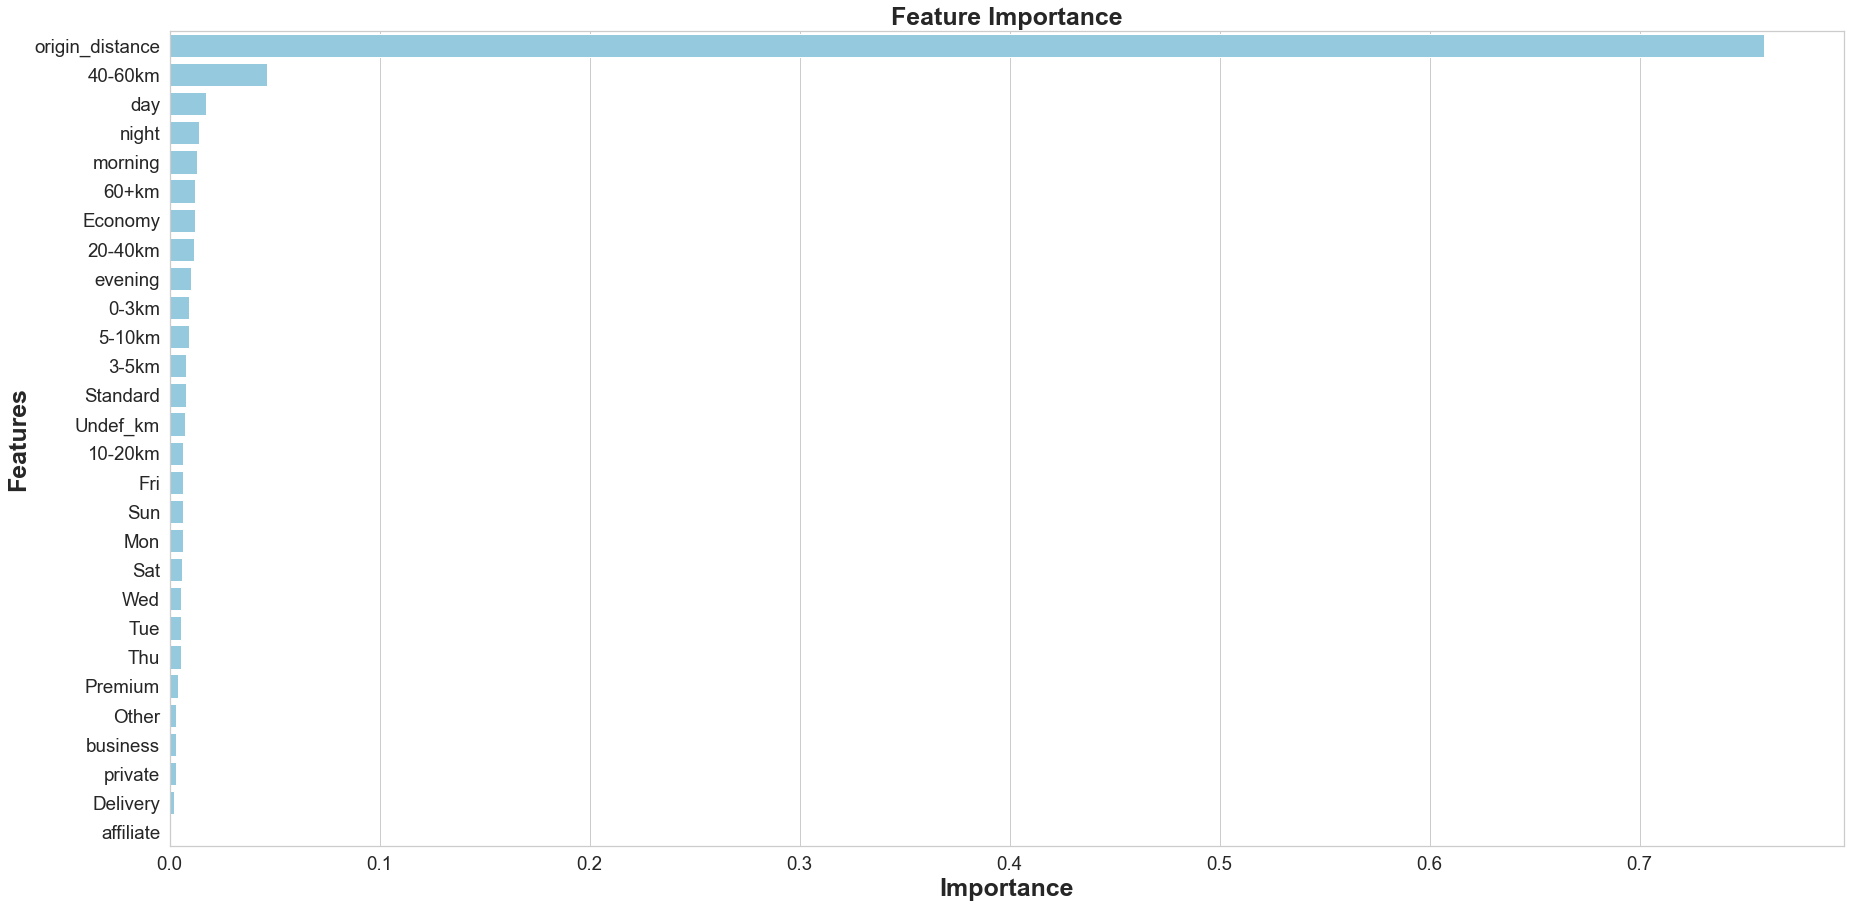

None

Features  Gini-Importance
0   origin_distance         0.759270
1           40-60km         0.046123
2               day         0.017473
3             night         0.014064
4           morning         0.012962
5             60+km         0.012042
6           Economy         0.011867
7           20-40km         0.011550
8           evening         0.010176
9             0-3km         0.009260
10           5-10km         0.009187
11            3-5km         0.007791
12         Standard         0.007768
13         Undef_km         0.007237
14          10-20km         0.006500
15              Fri         0.006431
16              Sun         0.006408
17              Mon         0.006284
18              Sat         0.006081
19              Wed         0.005480
20              Tue         0.005306
21              Thu         0.005227
22          Premium         0.003830
23            Other         0.003172
24         business         0.003024
25          private         0.002978
26         Delivery         0.001900
27        affiliate         0.000611

In [129]:
feats = {}
for feature, importance in zip(X.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

In [130]:
y_pred = rfc.predict(X_test)

from sklearn.metrics import confusion_matrix
conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
display(conf_matrix_baseline)
display('Baseline Random Forest recall score', recall_score(y_test, y_pred))        

predicted 0  predicted 1
actual 0        10344         4870
actual 1         5444         9267

'Baseline Random Forest recall score'

0.629936781999864

In [131]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
display(rfc.score(X_train_scaled, y_train))

0.9869815536205316

In [133]:
y_pred = rfc.predict(X_test_scaled)

from sklearn.metrics import confusion_matrix
conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
display(conf_matrix_baseline)

predicted 0  predicted 1
actual 0        10346         4868
actual 1         5447         9264